# Logistic regression|

## problem statement
- predict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('./hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df.head(5)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<AxesSubplot:>

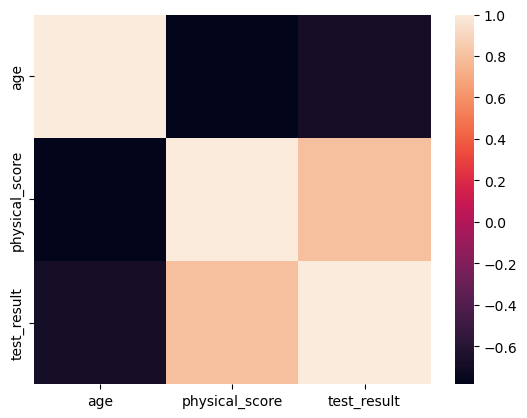

In [8]:
sns.heatmap(df.corr())

#### data preprocessing

In [9]:
x = df.drop('test_result', axis = 1)
y = df['test_result']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

### model building

In [15]:
from sklearn.linear_model import LogisticRegressionCV

# create a model
model = LogisticRegressionCV()

# train the model
model.fit(x_train, y_train)

LogisticRegressionCV()

In [16]:
y_true = y_test
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm


array([[525,  72],
       [ 43, 860]])

### get the tp, tn, fp, fn from cm
tn fp
fn tp

In [22]:
tn, fp, fn, tp = cm.ravel()

#### accuracy

In [23]:
accuracy = (tp + tn)/ (tp + tn + fp + fn)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 92.33%


In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f"accuracy = {accuracy * 100:.2f}%")

accuracy = 92.33%


### precision of +ve

In [27]:
precision_positive = tp/(tp+fp)
print(f"precision_positive = {precision_positive * 100:.2f}%")

precision_positive = 92.27%


In [28]:
from sklearn.metrics import precision_score
precision_positive = precision_score(y_true, y_pred)
print(f"precision_positive = {precision_positive * 100:.2f}%")

precision_positive = 92.27%


### precision -ve

In [31]:
precision_negative = tn / (tn + fn)
print(f"precision_negative = {precision_negative* 100:.2f}%")

precision_negative = 92.43%


### recall for +ve

In [37]:
recall_positive = tp/(tp+fn)
print(f"recall_positive = {recall_positive * 100:.2f}%")

recall_positive = 95.24%


In [38]:
from sklearn.metrics import recall_score
recall_positive = recall_score(y_true, y_pred)
print(f"recall_positive = {recall_positive * 100:.2f}%")

recall_positive = 95.24%


### negative recall

In [39]:
recall_negative = tn/(tn+fp)
print(f"recall_negative = {recall_negative * 100:.2f}%")

recall_negative = 87.94%


### f1 +ve score

In [45]:
f1_positive = 2 * ((precision_positive * recall_positive) / (precision_positive + recall_positive))
print(f"F1 for +ve = {f1_positive:.2f}")


F1 for +ve = 0.94


In [46]:
from sklearn.metrics import f1_score
f1_positive = f1_score(y_true, y_pred)
print(f"F1 for +ve = {f1_positive:.2f}")


F1 for +ve = 0.94


### classification report

### F1 -ve score


In [57]:
f1_negative = 2 * ((precision_negative * recall_negative) / (precision_negative + recall_negative))
print(f"F1 for -ve = {f1_negative:.2f}")

F1 for -ve = 0.90


In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       597
           1       0.92      0.95      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500



### result visualization

Text(0.5, 1.0, 'age vs physical_score')

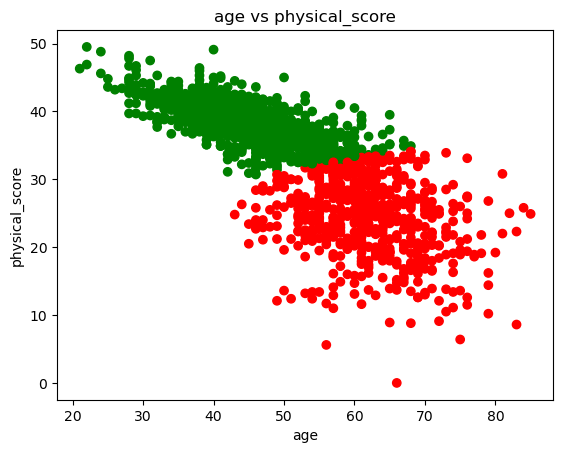

In [59]:
# color the dots based on prediction
# 1: green, 0: red
colors = []
for value in y_pred:
    colors.append("green" if value == 1 else "red")
plt.scatter(
          x_test['age'], 
          x_test['physical_score'], color = colors )
plt.xlabel('age')
plt.ylabel('physical_score')
plt.title('age vs physical_score')


Text(0.5, 1.0, 'age vs physical_score')

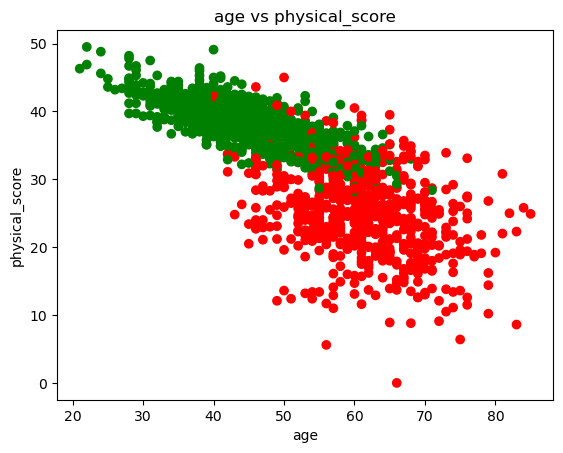

In [60]:
colors = []
for value in y_true:
    colors.append("green" if value == 1 else "red")
plt.scatter(
          x_test['age'], 
          x_test['physical_score'], color = colors )
plt.xlabel('age')
plt.ylabel('physical_score')
plt.title('age vs physical_score')
